In [112]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from mdp import *
from utils import *

%matplotlib inline


In [43]:
gridmdp_small = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [46]:
pi_gmdps = best_policy(gridmdp_small, value_iteration(gridmdp_small, .01)[0])
gridmdp_small.to_arrows(pi_gmdps)

[['>', '>', '>', '.'], ['^', None, '^', '.'], ['^', '>', '^', '<']]

In [47]:
from utils import print_table
print_table(gridmdp_small.to_arrows(pi_gmdps))


>   >      >   .
^   None   ^   .
^   >      ^   <


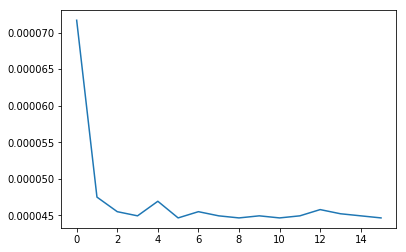

In [49]:
U_vi, vi_iter_time = value_iteration(gridmdp_small)
plt.plot(vi_iter_time)

[[ 0.29628832  0.253867    0.34475423  0.12987275]
 [ 0.39844322         nan  0.48644002 -1.        ]
 [ 0.50939438  0.64958568  0.79536209  1.        ]]


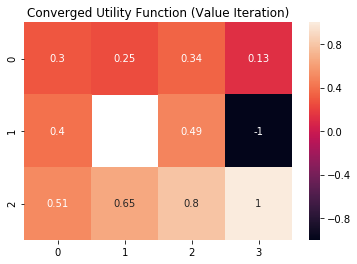

In [50]:
vi_utility_dict, iter_time = value_iteration(gridmdp_small)
#vi_utility_array = np.ndarray((3,4))

#for key,value in vi_utility_dict.items():
#    vi_utility_array[key[1],key[0]] = value


def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return utility_array

vi_utility_array = utility_dict_toarray(vi_utility_dict, (3,4))


print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")


>   >      >   .
^   None   ^   .
>   >      ^   <


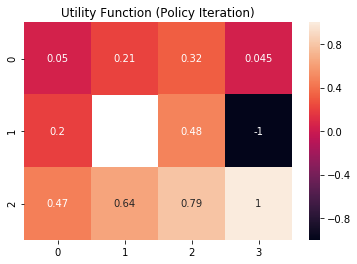

In [52]:
pi, U, pi_iter_time = policy_iteration(gridmdp_small)
pi_utility_array = utility_dict_toarray(U, (3,4))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp_small.to_arrows(pi))



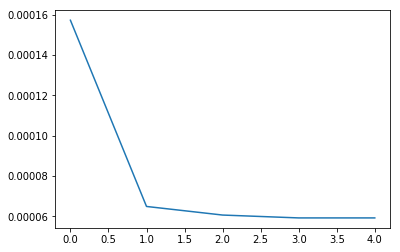

In [53]:
plt.plot(pi_iter_time)

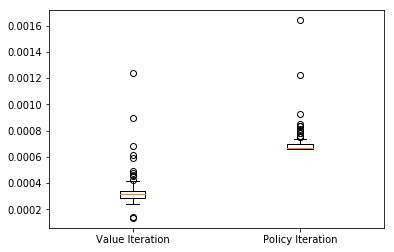

In [54]:
import timeit

setup = '''
import mdp

gridmdp_small = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp_small)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp_small)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

In [12]:
gridmdp = GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])

In [13]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '>', '>', '>', '>', 'v'],
 ['v', None, '>', '>', '>', '>', '>', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '.'],
 ['>', '>', '>', '>', '>', '^', '^', '.']]

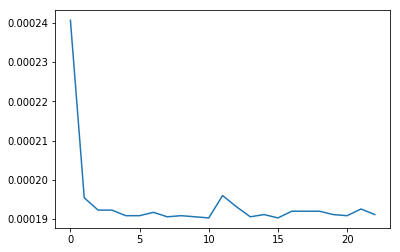

In [14]:
U_vi, vi_iter_time = value_iteration(gridmdp)
plt.plot(vi_iter_time)

In [15]:
vi_utility_dict, iter_time = value_iteration(gridmdp)

[[ 0.07811426  0.14250221  0.21406138  0.29407239  0.38267129  0.47989722
   0.47672057 -1.        ]
 [ 0.09458304  0.17293099  0.25632262  0.35649541  0.47451101  0.61465605
   0.78268053  1.        ]
 [ 0.03416822         nan  0.22648568  0.31536193  0.41687432  0.53261682
   0.66417455  0.81294033]
 [ 0.0470635   0.11081334  0.18177099  0.25698742  0.3409406   0.43435796
   0.53795894  0.65245418]]


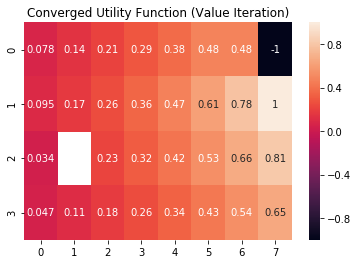

In [16]:
vi_utility_array = utility_dict_toarray(vi_utility_dict, (4,8))


print(vi_utility_array)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

>   >      >   >   >   >   >   v
v   None   >   >   >   >   >   v
>   >      >   >   >   >   >   .
>   >      >   >   >   ^   ^   .


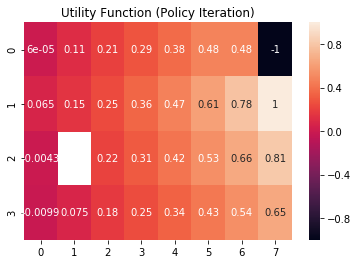

In [17]:
pi, U, pi_iter_time = policy_iteration(gridmdp)
pi_utility_array = utility_dict_toarray(U, (4,8))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp.to_arrows(pi))

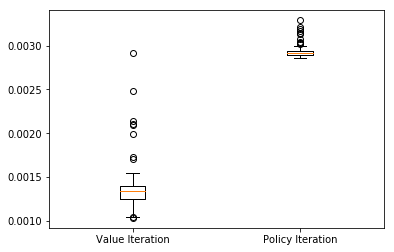

In [18]:
import timeit

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

In [86]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
print(pi)

policy == pi

{(7, 3): (0, -1), (1, 3): (1, 0), (3, 0): (1, 0), (2, 1): (1, 0), (6, 2): (1, 0), (5, 1): (1, 0), (0, 3): (1, 0), (7, 2): (0, -1), (4, 0): (1, 0), (3, 3): (1, 0), (6, 3): (1, 0), (5, 0): (0, 1), (2, 2): (1, 0), (4, 1): (1, 0), (1, 1): (1, 0), (3, 2): (1, 0), (0, 0): (1, 0), (7, 1): None, (6, 0): (0, 1), (2, 3): (1, 0), (4, 2): (1, 0), (1, 0): (1, 0), (5, 3): (1, 0), (0, 1): (1, 0), (7, 0): None, (6, 1): (1, 0), (3, 1): (1, 0), (2, 0): (1, 0), (4, 3): (1, 0), (5, 2): (1, 0), (0, 2): (0, -1)}


False

In [87]:
print_table(gridmdp.to_arrows(policy))

^   <      >   >   ^   <   >   >
>   None   >   >   ^   <   >   v
^   <      v   >   ^   <   >   >
>   >      >   >   >   >   <   >


In [88]:
print_table(gridmdp.to_arrows(pi))

>   >      >   >   >   >   >   v
v   None   >   >   >   >   >   v
>   >      >   >   >   >   >   .
>   >      >   >   >   ^   ^   .


In [110]:
from rl import *
q_agent = QLearningAgent(gridmdp, Ne=5, Rplus=2, alpha=lambda n: 60./(59+n))

for i in range(100000):
    run_single_trial(q_agent,gridmdp)

q_agent.Q

actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

policy = {}
for state in gridmdp.states:
    qvals = []
    for action in actions:
        print(state,action)
        qvals.append(q_agent.Q.get((state,action)))
    try:
        policy[state] = actions[qvals.index(max(qvals))]
    except:
        pass

print(policy)
        
print_table(gridmdp.to_arrows(policy))

(7, 3) (1, 0)
(7, 3) (0, 1)
(7, 3) (-1, 0)
(7, 3) (0, -1)
(1, 3) (1, 0)
(1, 3) (0, 1)
(1, 3) (-1, 0)
(1, 3) (0, -1)
(3, 0) (1, 0)
(3, 0) (0, 1)
(3, 0) (-1, 0)
(3, 0) (0, -1)
(2, 1) (1, 0)
(2, 1) (0, 1)
(2, 1) (-1, 0)
(2, 1) (0, -1)
(6, 2) (1, 0)
(6, 2) (0, 1)
(6, 2) (-1, 0)
(6, 2) (0, -1)
(5, 1) (1, 0)
(5, 1) (0, 1)
(5, 1) (-1, 0)
(5, 1) (0, -1)
(0, 3) (1, 0)
(0, 3) (0, 1)
(0, 3) (-1, 0)
(0, 3) (0, -1)
(7, 2) (1, 0)
(7, 2) (0, 1)
(7, 2) (-1, 0)
(7, 2) (0, -1)
(4, 0) (1, 0)
(4, 0) (0, 1)
(4, 0) (-1, 0)
(4, 0) (0, -1)
(3, 3) (1, 0)
(3, 3) (0, 1)
(3, 3) (-1, 0)
(3, 3) (0, -1)
(6, 3) (1, 0)
(6, 3) (0, 1)
(6, 3) (-1, 0)
(6, 3) (0, -1)
(5, 0) (1, 0)
(5, 0) (0, 1)
(5, 0) (-1, 0)
(5, 0) (0, -1)
(2, 2) (1, 0)
(2, 2) (0, 1)
(2, 2) (-1, 0)
(2, 2) (0, -1)
(4, 1) (1, 0)
(4, 1) (0, 1)
(4, 1) (-1, 0)
(4, 1) (0, -1)
(1, 1) (1, 0)
(1, 1) (0, 1)
(1, 1) (-1, 0)
(1, 1) (0, -1)
(3, 2) (1, 0)
(3, 2) (0, 1)
(3, 2) (-1, 0)
(3, 2) (0, -1)
(0, 0) (1, 0)
(0, 0) (0, 1)
(0, 0) (-1, 0)
(0, 0) (0, -1)
(7, 1) (1, 0)


In [111]:
print_table(gridmdp.to_arrows(pi))

>   >      >   >   >   >   >   v
v   None   >   >   >   >   >   v
>   >      >   >   >   >   >   .
>   >      >   >   >   ^   ^   .
